### Home Credit Default Risk
대출을 받은 고객의 정보를 바탕으로 상환여부를 예측하는 것이 목표
고객들의 상환 여부를 예측

### application 
데이터는 대출 신청 고객의 인적 사항, 거주지 정보, 직장 정보, 가족 정보, 신용카드 및 대출 정보등이 포함

<주요 컬럼 소개>
1. SK_ID_CURR: 대출 신청 고객의 고유 ID
2. TARGET: 대출 상환 여부 (0: 상환 성공, 1: 상환 실패)
3. NAME_CONTRACT_TYPE: 대출 계약 유형 (현금 대출, 리볼빙 대출 등)
4. CODE_GENDER: 대출 신청 고객의 성별
5. FLAG_OWN_CAR: 대출 신청 고객이 자동차를 소유하고 있는지 여부
6. FLAG_OWN_REALTY: 대출 신청 고객이 부동산을 소유하고 있는지 여부
7. AMT_INCOME_TOTAL: 대출 신청 고객의 연간 총 소득
8. AMT_CREDIT: 대출 신청 고객이 신청한 대출 금액
9. AMT_ANNUITY: 대출 상환 시 연간 상환금액
10. DAYS_BIRTH: 대출 신청 고객의 출생일부터 대출 신청일까지의 일수
11. DAYS_EMPLOYED: 대출 신청 고객이 현재 직장에서 근무한 일수
12. NAME_EDUCATION_TYPE: 대출 신청 고객의 교육 수준
13. NAME_FAMILY_STATUS: 대출 신청 고객의 가족 상태
14. NAME_HOUSING_TYPE: 대출 신청 고객의 거주 형태
15. REGION_POPULATION_RELATIVE: 대출 신청 고객이 거주하는 지역의 상대적인 인구 비율
16. DAYS_REGISTRATION: 대출 신청 고객이 현재 거주지에 등록된 날짜부터 대출 신청일까지의 일수
17. DAYS_ID_PUBLISH: 대출 신청 고객의 신분증 발급일부터 대출 신청일까지의 일수

In [58]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#Training data
app_train = pd.read_csv("/kaggle/input/home-credit-default-risk/application_train.csv")
print('Training data shape:', app_train.shape)
app_train.head()

Training data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
#testing data features
app_test=pd.read_csv("/kaggle/input/home-credit-default-risk/application_test.csv")
print('Testing data shape:', app_test.shape)
app_test.head()

Testing data shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis (EDA)

In [61]:
app_train['TARGET'].value_counts()
#(0: 상환 성공, 1: 상환 실패)

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='Frequency'>

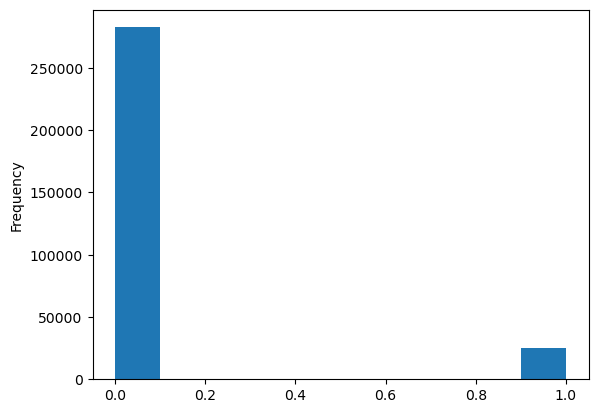

In [62]:
app_train['TARGET'].astype(int).plot.hist()

### Examine Missing Values

In [63]:
# Function to calculate missing values by column #Funct

def missing_values_tables(df):
    #Total missing values
    mis_val=df.isnull().sum()
    
    #Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    
    #Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    #Rename the columns
    mis_val_table_ren_columns=mis_val_table.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})
    
    #Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] !=0].sort_values('% of Total Values', ascending=False).round(1)
    
    #Print some summary infomation
    print("Your selected dataframe has " + str(df.shape[1]) + "columns.\n""There are " + str(mis_val_table_ren_columns.shape[0])+"columns that have missing values")
    
    #Return the dataframe with missing information
    return mis_val_table_ren_columns

In [64]:
#Missing values statiatics
missing_values = missing_values_tables(app_train)
missing_values.head()

Your selected dataframe has 122columns.
There are 67columns that have missing values


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4


### Column Type

In [65]:
#Number of each type of columns
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [66]:
#Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Encoding Categorical Variables

**Label Encoding and One-Hot Encoding**

In [67]:
# Label Encoding은 범주형 변수를 수치형으로 변환하는 방법 중 하나 ("red"를 0, "green"을 1, "blue"를 2)
# One-Hot Encoding은 "red"를 [1,0,0], "green"을 [0,1,0], "blue"를 [0,0,1]

In [68]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Interate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # if 2 or fewer unique categories
        if len(list(app_train[col].unique())) <=2:
            #train on the training data
            le.fit(app_train[col])
            #transform both training and testing data
            app_train[col]=le.transform(app_train[col])
            app_test[col]=le.transform(app_test[col])
            print(app_train[col].name)
            # Keep track of how many columns were label encoded
            le_count +=1
    
print('%d columns were label encoded.' % le_count)

NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
3 columns were label encoded.


In [69]:
# N=0 , Y=1
# Cash loans = 0 Revolving loans = 1 

In [70]:
# one-hot encoding of categorical variables
# 데이터프레임의 모든 범주형 열에 대해 더미 변수를 생성하고, 생성된 더미 변수들을 포함한 새로운 데이터프레임을 생성하는 코드
app_train=pd.get_dummies(app_train)
app_test=pd.get_dummies(app_test)

print('Training Features shape:', app_train.shape)
print('Testing Features shape:', app_test.shape)

Training Features shape: (307511, 243)
Testing Features shape: (48744, 239)


### Aligning Training and Testing Data
기계 학습 모델을 구축할 때는, 훈련 데이터와 테스트 데이터가 정렬되어 있거나 동기화되어 있는지 확인하는 것이 중요합니다.
즉, 동일한 열 및 변수를 가져야합니다.

In [71]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both data frames
# 두 데이터프레임의 공통된 열만 남기는 작업, 공통된 열만 남기기 위해 내부조인(inner)을 수행한다
app_train, app_test = app_train.align(app_test, join='inner', axis=1)

# Add the target back in
app_train['TARGET']=train_labels

print('Training Features shape:', app_train.shape)
print('Test Features shape:', app_test.shape)


Training Features shape: (307511, 240)
Test Features shape: (48744, 239)


### Back to Exploratory Data Analysis (EDA)

Anomalies 이상치

In [74]:
(app_train['DAYS_BIRTH']/-365).describe()
#대출 신청 고객의 출생일부터 대출 신청일까지의 일수

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [75]:
# 대출 신청 고객이 현재 직장에서 근무한 일수
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64